## Imports

In [1]:
from random import randint

import matplotlib.pyplot as plt
import numpy as np

## 2.6 Conditions

A particle moving randomly over time.

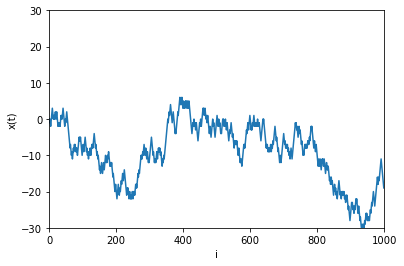

In [2]:
def dice_roll() -> int:
    return randint(1, 6)


def randomStepSize(size=1) -> int:
    """Take a random step of <size> forwards or backwards."""
    roll = dice_roll()
    if (roll <= 3):
        return -size
    else:
        return size


def bind(x:int, lower=-5, upper=5) -> int:
    """Set upper and lower bounds for x"""
    if (upper < x):
        return upper
    elif (x < lower):
        return lower
    else:
        return x


# Generate data
n = 1000
x = np.zeros(n, float)
for i in range(1, n):
    dx = randomStepSize()
    x[i] = x[i-1] + dx
    # x[i] = bind(x[i])

    
# Configure plot
plt.axis((0, n, -30, 30))
plt.ylabel(r'x(t)')
plt.xlabel('i')

# Plot
plt.plot(x)
plt.show()

## 2.7 Reading Real Data

Read in cumulative corona deaths in Tokyo and plot over time.

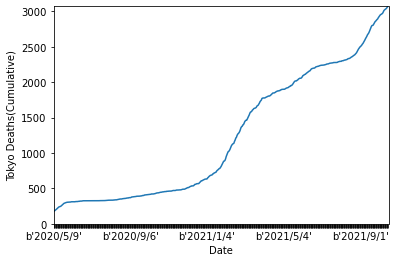

In [46]:
data = np.loadtxt(
    '../data/corona_deaths_cumulative_daily.csv',
    dtype={
        'names': ('Date', 'Prefecture', 'Deaths(Cumulative)'),
        'formats': ('S9', 'S10', 'i')
    },
    delimiter=',',
    skiprows=1,
)


def filter_data_by_prefecture(pref: str, data=data):
    return [ d for d in data if d[1] == pref.encode('UTF-8') ]


# Generate data
data_tokyo = filter_data_by_prefecture('Tokyo')
dates = [ d[0] if not (i % 120) else '' for i, d in enumerate(data_tokyo) ]
deaths = [ d[2] for d in data_tokyo ]

# Configure Plot
plt.axis((0, len(dates), 0, max(deaths)))
plt.ylabel('Tokyo Deaths(Cumulative)')
plt.xlabel('Date')

x = range(len(dates))
plt.xticks(x, dates)

# Plot
plt.plot(x, deaths)
plt.show()